In [ ]:
##Transfer learning fine tunning and feature extraction code # resnet nodel

In [ ]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-07-13 10:06:18--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-07-13 10:06:18--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60808e2b4b5639f5e58d83c51c.dl.dropboxusercontent.com/zip_download_get/Ae2mpYaTeL4TUuNe9TkcRxJL1aCGRg_7gNEeQNbernFkPkiaxwEtJQhQBaDcXH4UsVVcnBgKK8AGq0AJIqGviItw9DH1NaVbFNVVkzAvpW9GdQ [following]
--2020-07-13 10:06:20--  https://uc60808e2b4b5639f5e58d83c51c.dl.dropboxusercontent.com/zip_download_get/Ae2mpYaTeL4TUuNe9TkcRxJL1aCGRg_7gNEeQNbernFkPkiaxwEtJQhQBaDcXH4UsVVcnBgKK8AGq0AJI

In [ ]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [ ]:
!ls
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
#from keras.layers import *
from keras.models import Model
from keras.utils import np_utils
import random

import matplotlib.pyplot as plt

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


Using TensorFlow backend.


In [ ]:
import os, shutil
folders = os.listdir("Images")
print(folders)

['horses', 'cats', 'dogs', 'humans']


In [ ]:
image_data = []
labels = []
label_dict = {'cats':0,'dogs':1,'horses':2,'humans':3}

In [ ]:
for ix in folders:
  path = os.path.join("Images",ix)
  print(path)

Images/horses
Images/cats
Images/dogs
Images/humans


In [ ]:
for ix in folders:
    path = os.path.join("Images",ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [ ]:
print(len(image_data),len(labels))

808 808


In [ ]:
##randomly shuffle this data

In [ ]:
#to study zip "https://www.geeksforgeeks.org/zip-in-python/" refer this 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [ ]:
print(labels[:5])##Means the data has been shuffled

[3, 0, 2, 2, 0]


In [ ]:
##MLP always expect form u to give one hot labels

In [ ]:
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [ ]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808, 4)


In [ ]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
#form here u have to make ur own classifer that is adding the dense layer but u can se flateening will make large no of parameteres (None, 7, 7, 2048)  
#so to sort this we will use global average pooling so it will convet this 7*7*2048 into 1*1*2048 it is going to replace each channel with its mean 7*7 49 mean into 1

In [ ]:
##so we have to do this modification and we will use gap layer followed by the dense layer

In [ ]:
                                #Here u have to give the input for this layer here the input is model.output
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)#input in fully connected is output of verage layer
d1 = Dropout(0.5)(fc1)#add dropout to reduce the overfitting 
fc2 = Dense(4,activation='softmax')(d1)
#classifer part completed
#final task is to combine these 2 part that is generic convolutional layer model and 
#In this model u should give form where the input come and from where the output goes
#Functional apis of keras
#refer - https://keras.io/guides/functional_api/#:~:text=The%20Keras%20functional%20API%20is,with%20multiple%20inputs%20or%20outputs.
#This is a resent 50 based model
model_new = Model(inputs=model.input, outputs= fc2)
model_new.summary()
##Such type of models are called end to end trainable form of models which is what eactly we want

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
#compiling the model
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
##Now we will apply fine tunning to do the model

In [ ]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7fe90deb9eb8>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7fe90de6a400>
2 <keras.layers.convolutional.Conv2D object at 0x7fe90de6a550>
3 <keras.layers.normalization.BatchNormalization object at 0x7fe90de6a5c0>
4 <keras.layers.core.Activation object at 0x7fe96c9c1dd8>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7fe90d612e10>
6 <keras.layers.pooling.MaxPooling2D object at 0x7fe90d631898>
7 <keras.layers.convolutional.Conv2D object at 0x7fe90d6317f0>
8 <keras.layers.normalization.BatchNormalization object at 0x7fe90de6ad30>
9 <keras.layers.core.Activation object at 0x7fe900299f28>
10 <keras.layers.convolutional.Conv2D object at 0x7fe900299fd0>
11 <keras.layers.normalization.BatchNormalization object at 0x7fe9002367f0>
12 <keras.layers.core.Activation object at 0x7fe900236208>
13 <keras.layers.convolutional.Conv2D object at 0x7fe9002524e0>
14 <keras.layers.convolutional.Conv2D object at 0x7fe9001eaac8>
15 <keras.lay

In [ ]:
#so we have total 178 layers we have to check that till which layer we have to backpropagate

In [ ]:
#till 175 we have resent model at 175 we have added the global layer
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 10,
                    validation_split=0.20
                    )

Train on 646 samples, validate on 162 samples
Epoch 1/10
646/646 [==============================] - 4s 7ms/step - loss: 0.2464 - accuracy: 0.9381 - val_loss: 0.1981 - val_accuracy: 0.9321
Epoch 2/10
646/646 [==============================] - 4s 7ms/step - loss: 0.2112 - accuracy: 0.9458 - val_loss: 0.1720 - val_accuracy: 0.9321
Epoch 3/10
646/646 [==============================] - 4s 7ms/step - loss: 0.1573 - accuracy: 0.9582 - val_loss: 0.1563 - val_accuracy: 0.9444
Epoch 4/10
646/646 [==============================] - 4s 7ms/step - loss: 0.1515 - accuracy: 0.9628 - val_loss: 0.1501 - val_accuracy: 0.9444
Epoch 5/10
646/646 [==============================] - 4s 7ms/step - loss: 0.1314 - accuracy: 0.9675 - val_loss: 0.1517 - val_accuracy: 0.9506
Epoch 6/10
646/646 [==============================] - 4s 7ms/step - loss: 0.1322 - accuracy: 0.9644 - val_loss: 0.1480 - val_accuracy: 0.9506
Epoch 7/10
646/646 [==============================] - 4s 7ms/step - loss: 0.1126 - accuracy: 0.9690 - 

In [ ]:
#So we can se how fat we can train using the transfer learning

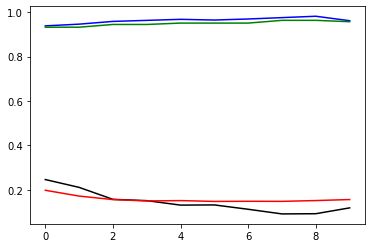

In [ ]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'b')
plt.plot(hist.history['val_accuracy'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()